<a href="https://colab.research.google.com/github/codebuzer/Bioactivity-Prediction-App/blob/main/igibproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/igib_project1/expmat.tsv", sep = '\t')

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/igib_project1/metadata.tsv', sep = '\t')

In [5]:
df1.head()

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
0,GSM4602241,0.290419,0.155136,-0.181369,-0.015744,0.039236,-0.146536,0.236752,-0.002832,0.240613,...,-0.043060,0.077041,0.278701,-0.240203,-0.201589,0.321952,0.075405,0.282020,-0.012067,0.172619
1,GSM4602242,0.033998,-0.073510,-0.024664,-0.020609,-0.070523,-0.111419,0.034210,-0.035007,-0.056222,...,-0.017659,-0.074952,0.019122,0.071927,0.071041,0.121803,-0.043223,0.010535,0.080000,0.242266
2,GSM4602243,-0.439669,-0.229209,-0.245936,0.268637,0.014308,-0.087299,-0.150903,0.096379,0.362553,...,-0.012459,-0.117931,-0.167248,-0.265756,0.012495,0.071520,0.115458,-0.091159,-0.108541,0.340207
3,GSM4602244,-0.151441,-0.187122,-0.383706,-0.242257,-0.217275,-0.420945,-0.012780,-0.343916,-0.000867,...,-0.278508,0.036693,-0.209867,-0.105908,-0.105786,0.106484,0.038990,0.006374,0.180696,0.343715
4,GSM4602245,0.330232,0.045676,-0.122178,-0.001248,0.065784,-0.180799,0.192823,-0.050893,-0.195102,...,-0.059848,0.073766,0.058908,0.040280,-0.018763,0.063081,-0.149442,0.075480,0.266766,0.084533


In [6]:
df1 = df1.iloc[:,1:]

In [7]:
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
0,0.290419,0.155136,-0.181369,-0.015744,0.039236,-0.146536,0.236752,-0.002832,0.240613,0.163908,...,-0.043060,0.077041,0.278701,-0.240203,-0.201589,0.321952,0.075405,0.282020,-0.012067,0.172619
1,0.033998,-0.073510,-0.024664,-0.020609,-0.070523,-0.111419,0.034210,-0.035007,-0.056222,-0.000280,...,-0.017659,-0.074952,0.019122,0.071927,0.071041,0.121803,-0.043223,0.010535,0.080000,0.242266
2,-0.439669,-0.229209,-0.245936,0.268637,0.014308,-0.087299,-0.150903,0.096379,0.362553,-0.073052,...,-0.012459,-0.117931,-0.167248,-0.265756,0.012495,0.071520,0.115458,-0.091159,-0.108541,0.340207
3,-0.151441,-0.187122,-0.383706,-0.242257,-0.217275,-0.420945,-0.012780,-0.343916,-0.000867,-0.064064,...,-0.278508,0.036693,-0.209867,-0.105908,-0.105786,0.106484,0.038990,0.006374,0.180696,0.343715
4,0.330232,0.045676,-0.122178,-0.001248,0.065784,-0.180799,0.192823,-0.050893,-0.195102,0.114854,...,-0.059848,0.073766,0.058908,0.040280,-0.018763,0.063081,-0.149442,0.075480,0.266766,0.084533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.048350,0.203425,0.292148,-0.066557,0.333795,0.169132,-0.360702,0.233100,-0.189518,0.083925,...,0.020203,0.169539,-0.147931,0.118192,0.155953,-0.395584,-0.110981,-0.236437,0.126046,-0.117055
480,0.019730,0.113175,0.131340,0.304732,0.461142,0.259164,-0.164739,0.465003,0.397407,0.131311,...,0.217886,-0.276264,0.013711,-0.053048,0.372802,0.180680,-0.249412,-0.209629,-0.312979,-0.298504
481,-0.183947,0.139277,0.083529,0.105502,0.366155,0.324141,-0.419905,0.380580,-0.055077,0.012015,...,0.038308,0.018252,-0.204049,0.175399,0.382163,-0.526263,-0.123163,-0.409042,-0.118416,-0.223350
482,0.195342,-0.092915,-0.058966,-0.243610,-0.122261,-0.072730,0.022921,0.028437,-0.287779,0.051702,...,-0.014744,0.189937,0.079719,-0.026577,-0.026807,-0.076272,0.067264,0.210527,0.060620,0.177384


In [8]:
df2= df2.iloc[:,1:]

In [9]:
df2

,infection,batch,agenum,ctnum
0,1,I,64.0,18.88
1,1,I,30.0,21.18
2,1,I,47.0,24.24
3,1,G,67.0,18.91
4,1,H,62.0,25.62
...,...,...,...,...
479,0,S,41.0,NaN
480,0,S,22.0,NaN
481,0,U,59.0,NaN
482,0,U,49.0,NaN


In [10]:
df_concat = pd.concat([df1, df2], axis=1)

In [11]:
df_concat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V45,V46,V47,V48,V49,V50,infection,batch,agenum,ctnum
0,0.290419,0.155136,-0.181369,-0.015744,0.039236,-0.146536,0.236752,-0.002832,0.240613,0.163908,...,-0.201589,0.321952,0.075405,0.282020,-0.012067,0.172619,1,I,64.0,18.88
1,0.033998,-0.073510,-0.024664,-0.020609,-0.070523,-0.111419,0.034210,-0.035007,-0.056222,-0.000280,...,0.071041,0.121803,-0.043223,0.010535,0.080000,0.242266,1,I,30.0,21.18
2,-0.439669,-0.229209,-0.245936,0.268637,0.014308,-0.087299,-0.150903,0.096379,0.362553,-0.073052,...,0.012495,0.071520,0.115458,-0.091159,-0.108541,0.340207,1,I,47.0,24.24
3,-0.151441,-0.187122,-0.383706,-0.242257,-0.217275,-0.420945,-0.012780,-0.343916,-0.000867,-0.064064,...,-0.105786,0.106484,0.038990,0.006374,0.180696,0.343715,1,G,67.0,18.91
4,0.330232,0.045676,-0.122178,-0.001248,0.065784,-0.180799,0.192823,-0.050893,-0.195102,0.114854,...,-0.018763,0.063081,-0.149442,0.075480,0.266766,0.084533,1,H,62.0,25.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.048350,0.203425,0.292148,-0.066557,0.333795,0.169132,-0.360702,0.233100,-0.189518,0.083925,...,0.155953,-0.395584,-0.110981,-0.236437,0.126046,-0.117055,0,S,41.0,NaN
480,0.019730,0.113175,0.131340,0.304732,0.461142,0.259164,-0.164739,0.465003,0.397407,0.131311,...,0.372802,0.180680,-0.249412,-0.209629,-0.312979,-0.298504,0,S,22.0,NaN
481,-0.183947,0.139277,0.083529,0.105502,0.366155,0.324141,-0.419905,0.380580,-0.055077,0.012015,...,0.382163,-0.526263,-0.123163,-0.409042,-0.118416,-0.223350,0,U,59.0,NaN
482,0.195342,-0.092915,-0.058966,-0.243610,-0.122261,-0.072730,0.022921,0.028437,-0.287779,0.051702,...,-0.026807,-0.076272,0.067264,0.210527,0.060620,0.177384,0,U,49.0,NaN


In [12]:
y = df_concat['infection']

In [13]:
X = df_concat.drop(['infection'], axis=1)

In [14]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V44,V45,V46,V47,V48,V49,V50,batch,agenum,ctnum
0,0.290419,0.155136,-0.181369,-0.015744,0.039236,-0.146536,0.236752,-0.002832,0.240613,0.163908,...,-0.240203,-0.201589,0.321952,0.075405,0.282020,-0.012067,0.172619,I,64.0,18.88
1,0.033998,-0.073510,-0.024664,-0.020609,-0.070523,-0.111419,0.034210,-0.035007,-0.056222,-0.000280,...,0.071927,0.071041,0.121803,-0.043223,0.010535,0.080000,0.242266,I,30.0,21.18
2,-0.439669,-0.229209,-0.245936,0.268637,0.014308,-0.087299,-0.150903,0.096379,0.362553,-0.073052,...,-0.265756,0.012495,0.071520,0.115458,-0.091159,-0.108541,0.340207,I,47.0,24.24
3,-0.151441,-0.187122,-0.383706,-0.242257,-0.217275,-0.420945,-0.012780,-0.343916,-0.000867,-0.064064,...,-0.105908,-0.105786,0.106484,0.038990,0.006374,0.180696,0.343715,G,67.0,18.91
4,0.330232,0.045676,-0.122178,-0.001248,0.065784,-0.180799,0.192823,-0.050893,-0.195102,0.114854,...,0.040280,-0.018763,0.063081,-0.149442,0.075480,0.266766,0.084533,H,62.0,25.62


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
479    0
480    0
481    0
482    0
483    0
Name: infection, Length: 484, dtype: int64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state = 42, shuffle = True)


In [17]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'batch',
       'agenum', 'ctnum'],
      dtype='object')

Text(0, 0.5, 'Frequency')

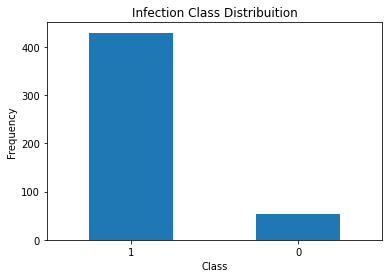

In [18]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Infection Class Distribuition")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

In [19]:
X_train.isnull().sum()

V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
V41        0
V42        0
V43        0
V44        0
V45        0
V46        0
V47        0
V48        0
V49        0
V50        0
batch      0
agenum    33
ctnum     49
dtype: int64

Text(0, 0.5, 'Frequency')

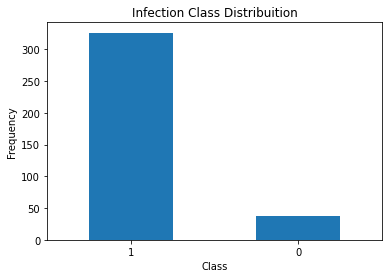

In [20]:
count_classes = pd.value_counts(y_train, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Infection Class Distribuition")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

In [21]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V44,V45,V46,V47,V48,V49,V50,batch,agenum,ctnum
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,-0.065396,0.001392,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,L,50.0,22.81
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0.112702,0.000115,0.019317,-0.070527,0.053134,0.179474,0.139848,Q,62.0,19.35
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,0.122401,0.079855,-0.198764,0.233642,-0.184023,-0.180516,-0.115021,D,72.0,21.34
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,0.007655,-0.186151,-0.235243,-0.019517,-0.233459,0.179042,0.272707,N,30.0,25.36
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,-0.066818,-0.118973,0.001721,0.051858,-0.027145,0.207186,0.133435,M,35.0,24.41


In [22]:
X_train[X_train['ctnum'].isnull()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V44,V45,V46,V47,V48,V49,V50,batch,agenum,ctnum
424,-0.187508,-0.016116,-0.087082,0.240851,-0.336796,0.046381,-0.144127,0.035951,0.021139,-0.026164,...,0.097606,0.125045,-0.185719,-0.166523,-0.115816,-0.143607,-0.145140,R,NaN,NaN
420,-0.447389,-0.234375,-0.178421,-0.518826,0.043532,-0.435427,-0.288224,-0.052177,-0.369570,-0.381263,...,-0.112166,-0.218670,-0.314627,0.146803,-0.288612,0.299249,0.322173,T,NaN,NaN
450,0.334182,0.228224,0.134082,0.031639,0.179715,0.062504,0.350601,0.149972,-0.045935,0.295454,...,-0.021614,-0.020422,0.196734,-0.117895,-0.107268,-0.102877,-0.352543,S,63.0,NaN
447,0.016407,0.044742,0.252009,0.008886,0.354471,0.094044,-0.235011,0.096421,-0.268597,0.071974,...,0.090542,0.159995,-0.185247,-0.198457,-0.153251,0.031898,-0.176288,S,30.0,NaN
440,0.297221,-0.019278,-0.040845,-0.177755,-0.307122,-0.020387,0.319771,-0.294625,-0.061891,-0.079442,...,-0.044503,-0.098335,0.222261,-0.067992,0.024088,0.147650,0.170963,R,23.0,NaN
451,-0.052848,0.078282,0.231893,-0.066721,0.303079,0.280792,-0.350062,0.428869,-0.047236,0.068979,...,0.215077,0.296851,-0.404540,-0.115183,-0.329884,-0.181644,-0.318780,S,74.0,NaN
441,0.319130,0.045807,0.052305,-0.061171,-0.006289,-0.028171,0.237129,-0.141659,-0.153892,0.038362,...,0.142118,0.082912,-0.057898,0.177827,-0.008561,0.140332,0.146151,R,60.0,NaN
432,-0.486813,-0.275776,-0.170238,0.003199,-0.391794,-0.080845,-0.500581,-0.068334,-0.236194,-0.424154,...,0.303012,0.031270,-0.422996,-0.077078,-0.307343,-0.229584,-0.321516,R,47.0,NaN
449,0.078679,0.152893,0.297757,-0.099582,0.537385,0.089583,-0.308832,0.357936,0.114700,0.101575,...,0.091824,0.277902,-0.443554,0.174364,-0.284759,-0.017049,-0.195525,S,22.0,NaN
429,0.549157,0.116314,0.148052,0.083272,-0.100580,0.212167,0.400486,-0.189369,-0.064671,0.146758,...,-0.077816,-0.141394,0.140532,-0.137211,0.120673,-0.056599,0.214193,R,NaN,NaN


In [23]:
import numpy as np
X_train['ctnum_null']= np.where(X_train['ctnum'].isnull(),1,0)
X_train['ctnum_null'].mean()

0.1349862258953168

In [24]:
import numpy as np
X_train['agenum_null']= np.where(X_train['agenum'].isnull(),1,0)
X_train['agenum_null'].mean()

0.09090909090909091

In [25]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V46,V47,V48,V49,V50,batch,agenum,ctnum,ctnum_null,agenum_null
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,L,50.0,22.81,0,0
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0.019317,-0.070527,0.053134,0.179474,0.139848,Q,62.0,19.35,0,0
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,-0.198764,0.233642,-0.184023,-0.180516,-0.115021,D,72.0,21.34,0,0
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,-0.235243,-0.019517,-0.233459,0.179042,0.272707,N,30.0,25.36,0,0
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,0.001721,0.051858,-0.027145,0.207186,0.133435,M,35.0,24.41,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.178225,0.033551,0.130311,0.309763,0.053018,0.246189,-0.223009,0.235498,0.124811,0.142615,...,-0.184073,-0.171686,-0.212670,-0.155635,-0.331231,B,43.0,21.31,0,0
270,-0.084461,-0.050759,-0.028248,0.007801,0.076674,-0.079665,-0.131783,-0.160692,0.128844,-0.152991,...,-0.065863,0.067659,-0.011506,0.059641,0.147339,P,53.0,21.29,0,0
348,0.001382,0.137369,0.023774,-0.089512,0.381360,-0.220417,0.073235,0.064732,-0.116873,0.123650,...,0.332833,-0.102154,0.273732,0.103474,0.189055,A,74.0,24.13,0,0
435,-0.065488,-0.064513,-0.098331,0.007988,-0.174017,0.171827,-0.113032,-0.179929,0.130941,-0.105149,...,0.154636,0.063614,0.005067,-0.164977,-0.410573,R,45.0,NaN,1,0


In [26]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [32]:
median=X_train.agenum.median()
median

53.0

In [28]:
impute_nan(X_train,'agenum',median)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V47,V48,V49,V50,batch,agenum,ctnum,ctnum_null,agenum_null,agenum_median
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,-0.004632,-0.146563,0.013029,-0.131632,L,50.0,22.81,0,0,50.0
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,-0.070527,0.053134,0.179474,0.139848,Q,62.0,19.35,0,0,62.0
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,0.233642,-0.184023,-0.180516,-0.115021,D,72.0,21.34,0,0,72.0
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,-0.019517,-0.233459,0.179042,0.272707,N,30.0,25.36,0,0,30.0
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,0.051858,-0.027145,0.207186,0.133435,M,35.0,24.41,0,0,35.0


In [29]:
print(X_train['agenum'].std())
print(X_train['agenum_median'].std())

18.67830957049281
17.806628651315446


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

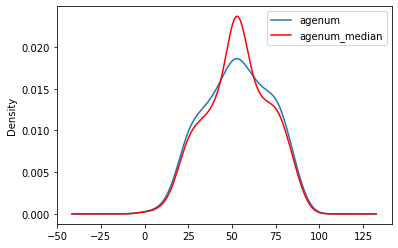

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['agenum'].plot(kind='kde', ax=ax)
X_train.agenum_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [33]:
median=X_train.ctnum.median()
median

21.034999999999997

In [34]:
impute_nan(X_train,'ctnum',median)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V48,V49,V50,batch,agenum,ctnum,ctnum_null,agenum_null,agenum_median,ctnum_median
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,-0.146563,0.013029,-0.131632,L,50.0,22.81,0,0,50.0,22.81
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0.053134,0.179474,0.139848,Q,62.0,19.35,0,0,62.0,19.35
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,-0.184023,-0.180516,-0.115021,D,72.0,21.34,0,0,72.0,21.34
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,-0.233459,0.179042,0.272707,N,30.0,25.36,0,0,30.0,25.36
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,-0.027145,0.207186,0.133435,M,35.0,24.41,0,0,35.0,24.41


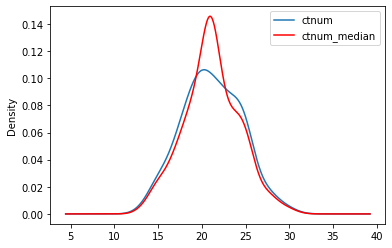

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['ctnum'].plot(kind='kde', ax=ax)
X_train.ctnum_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [36]:
mean=X_train.ctnum.mean()
mean

21.137715605095543

In [37]:
impute_nan(X_train,'ctnum',mean)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V48,V49,V50,batch,agenum,ctnum,ctnum_null,agenum_null,agenum_median,ctnum_median
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,-0.146563,0.013029,-0.131632,L,50.0,22.81,0,0,50.0,22.81
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0.053134,0.179474,0.139848,Q,62.0,19.35,0,0,62.0,19.35
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,-0.184023,-0.180516,-0.115021,D,72.0,21.34,0,0,72.0,21.34
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,-0.233459,0.179042,0.272707,N,30.0,25.36,0,0,30.0,25.36
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,-0.027145,0.207186,0.133435,M,35.0,24.41,0,0,35.0,24.41


In [39]:
def impute_nan_mean(df,variable,mean):
    df[variable+"_mean"]=df[variable].fillna(mean)

In [40]:
mean=X_train.ctnum.mean()
mean

21.137715605095543

In [41]:
impute_nan_mean(X_train,'ctnum',mean)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V49,V50,batch,agenum,ctnum,ctnum_null,agenum_null,agenum_median,ctnum_median,ctnum_mean
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,0.013029,-0.131632,L,50.0,22.81,0,0,50.0,22.81,22.81
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0.179474,0.139848,Q,62.0,19.35,0,0,62.0,19.35,19.35
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,-0.180516,-0.115021,D,72.0,21.34,0,0,72.0,21.34,21.34
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,0.179042,0.272707,N,30.0,25.36,0,0,30.0,25.36,25.36
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,0.207186,0.133435,M,35.0,24.41,0,0,35.0,24.41,24.41


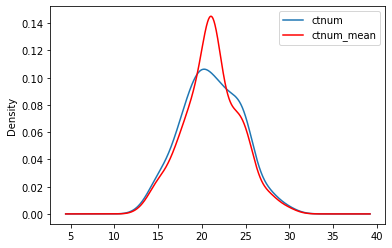

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['ctnum'].plot(kind='kde', ax=ax)
X_train.ctnum_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [43]:
X_train['agenum'].dropna().sample(X_train['agenum'].isnull().sum(),random_state=0)

97     22.0
74     44.0
301    40.0
472    30.0
471    54.0
165    75.0
366    57.0
245    37.0
219    78.0
434    51.0
263    57.0
204    65.0
404    42.0
199    59.0
327    50.0
269    57.0
197    57.0
194    62.0
351    86.0
267    30.0
47     51.0
14     86.0
316    38.0
58     78.0
162    56.0
21     23.0
308    71.0
288    36.0
315    39.0
133    27.0
240    71.0
216    33.0
230    77.0
Name: agenum, dtype: float64

In [44]:
X_train[X_train['agenum'].isnull()].index

Int64Index([424, 420, 346, 314, 354, 109, 429, 422, 139, 349, 369, 416, 123,
            357, 423, 419, 275, 179, 127, 352, 221, 415, 279, 421, 417, 295,
            428, 166, 363, 252, 276, 443, 413],
           dtype='int64')

In [45]:
def impute_nan(df,variable,mode):
    df[variable+"_mode"]=df[variable].fillna(mode)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [47]:
mode=X_train.agenum.mode()
mode

0    51.0
dtype: float64

In [48]:
impute_nan(X_train,"agenum",mode)

In [49]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch,agenum,ctnum,ctnum_null,agenum_null,agenum_median,ctnum_median,ctnum_mean,agenum_mode,agenum_random
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,L,50.0,22.81,0,0,50.0,22.81,22.81,50.0,50.0
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,Q,62.0,19.35,0,0,62.0,19.35,19.35,62.0,62.0
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,D,72.0,21.34,0,0,72.0,21.34,21.34,72.0,72.0
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,N,30.0,25.36,0,0,30.0,25.36,25.36,30.0,30.0
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,M,35.0,24.41,0,0,35.0,24.41,24.41,35.0,35.0


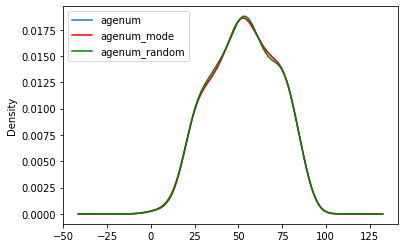

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['agenum'].plot(kind='kde', ax=ax)
X_train.agenum_mode.plot(kind='kde', ax=ax, color='red')
X_train.agenum_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

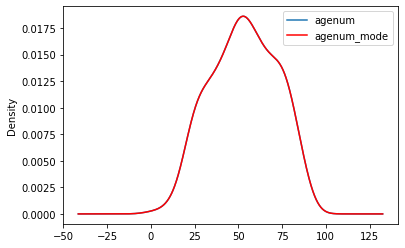

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['agenum'].plot(kind='kde', ax=ax)
X_train.agenum_mode.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [52]:
mode=X_train.ctnum.mode()
mode

0    17.73
dtype: float64

In [ ]:
impute_nan(X_train,"c",mode)